In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("../../Data/cleanedNotRecoded.csv")

df = data.copy()

df = df.drop(["ID", "Customer_ID", "Name", "SSN", "Occupation"], axis=1)

df["Credit_Score"] = df["Credit_Score"].map({"Good":2, "Standard":1, "Poor":0})

In [17]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,88582,88583,88584,88585,88586,88587,88588,88589,88590,88591
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Age,23,23,23,23,23,23,23,23,28,28,...,28,28,25,25,25,25,25,25,25,25
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.84,1824.84,1824.84,1824.84,1824.84,1824.84,1824.84,1824.84,3037.99,3037.99,...,1929.91,1929.91,3359.42,3359.42,3359.42,3359.42,3359.42,3359.42,3359.42,3359.42
Num_Bank_Accounts,3,3,3,3,3,3,3,3,2,2,...,10,10,4,4,4,4,4,4,4,4
Num_Credit_Card,4,4,4,4,4,4,4,4,4,4,...,8,8,6,6,6,6,6,6,6,6
Interest_Rate,3,3,3,3,3,3,3,3,6,6,...,29,29,7,7,7,7,7,7,7,7
Num_of_Loan,4,4,4,4,4,4,4,4,1,1,...,5,5,2,2,2,2,2,2,2,2
Type_of_Loan,0.076445,0.076451,0.076448,0.076449,0.076449,0.076449,0.076449,0.076449,-0.084963,-0.084963,...,-0.171175,-0.171175,-0.268888,-0.268888,-0.268888,-0.268888,-0.268888,-0.268888,-0.268888,-0.268888
Delay_from_due_date,3,-1,3,5,6,8,3,3,3,7,...,33,33,23,23,20,23,18,27,20,18


In [18]:
from pycaret.classification import *
s = setup(df, target = 'Credit_Score', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(88592, 23)"
4,Transformed data shape,"(88592, 30)"
5,Transformed train set shape,"(62014, 30)"
6,Transformed test set shape,"(26578, 30)"
7,Numeric features,19
8,Categorical features,3
9,Preprocess,True


In [19]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

exp.setup(data, target = 'Credit_Score', session_id = 123, use_gpu=True,
          fix_imbalance = True, remove_outliers = True, normalize = True, normalize_method = "robust",
            transformation = True   )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,123
1,Target,Credit_Score
2,Target type,Multiclass
3,Target mapping,"Good: 0, Poor: 1, Standard: 2"
4,Original data shape,"(88592, 28)"
5,Transformed data shape,"(120904, 49)"
6,Transformed train set shape,"(94326, 49)"
7,Transformed test set shape,"(26578, 49)"
8,Numeric features,19
9,Categorical features,8


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [20]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8148,0.9133,0.8148,0.8154,0.8148,0.6928,0.6932,2.4900
et,Extra Trees Classifier,0.8066,0.9060,0.8066,0.8067,0.8065,0.6780,0.6781,1.4200
xgboost,Extreme Gradient Boosting,0.7773,0.8924,0.7773,0.7780,0.7775,0.6304,0.6305,0.8720
lightgbm,Light Gradient Boosting Machine,0.7502,0.8777,0.7502,0.7528,0.7508,0.5869,0.5873,1.0050
knn,K Neighbors Classifier,0.7357,0.8542,0.7357,0.7344,0.7339,0.5570,0.5577,0.7690
dt,Decision Tree Classifier,0.7297,0.7685,0.7297,0.7296,0.7296,0.5490,0.5491,0.3110
gbc,Gradient Boosting Classifier,0.7197,0.0000,0.7197,0.7241,0.7205,0.5357,0.5366,16.9990
qda,Quadratic Discriminant Analysis,0.6676,0.0000,0.6676,0.7162,0.6693,0.4907,0.5088,0.1140
lda,Linear Discriminant Analysis,0.6602,0.0000,0.6602,0.6856,0.6636,0.4627,0.4698,0.1320
ridge,Ridge Classifier,0.6570,0.0000,0.6570,0.6749,0.6596,0.4492,0.4535,0.0920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

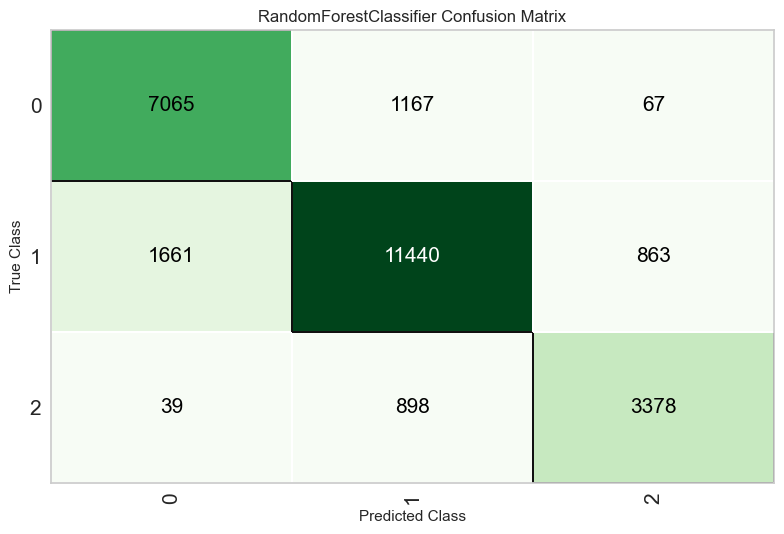

In [21]:
plot_model(best, plot = 'confusion_matrix')

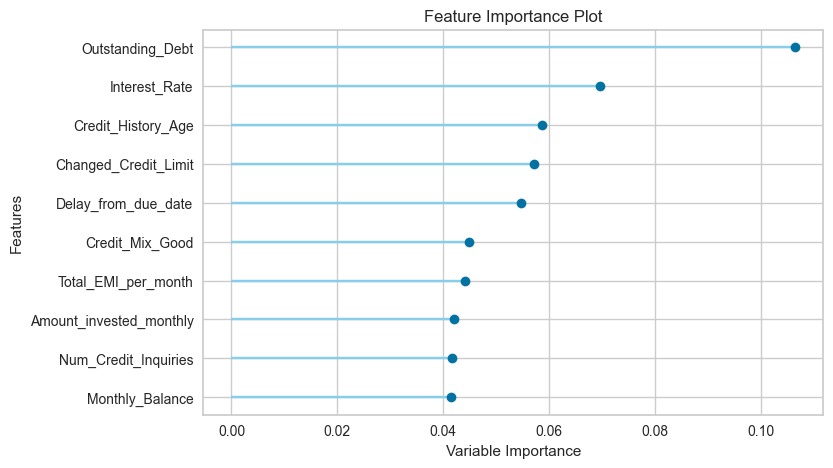

In [22]:
plot_model(best, plot = 'feature')